In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [11]:
with open(r'logs\training_logs.json') as json_file:
    json_data = json.load(json_file)
    print(json_data.keys())

    for date, values in json_data.items():
        print(date)
        print(values.keys())

dict_keys(['17.11.22 19:12:57', '24.11.22 20:22:23', '25.11.22 12:48:43', '30.11.22 19:48:47', '30.11.22 23:05:02', '01.12.22 02:19:44'])
17.11.22 19:12:57
dict_keys(['title', 'setup', 'model', 'freeze', 'dataset', 'batchsize', 'current_epoch', 'current_checkpoint', 'best_checkpoint', 'optim_data', 'history', 'best_config'])
24.11.22 20:22:23
dict_keys(['title', 'setup', 'model', 'freeze', 'dataset', 'batchsize', 'current_epoch', 'current_checkpoint', 'best_checkpoint', 'optim_data', 'history', 'best_config'])
25.11.22 12:48:43
dict_keys(['title', 'setup', 'model', 'freeze', 'dataset', 'batchsize', 'optimizer', 'scheduler', 'current_epoch', 'current_checkpoint', 'best_checkpoint', 'optim_data', 'history', 'best_config'])
30.11.22 19:48:47
dict_keys(['title', 'setup', 'model', 'freeze', 'dataset', 'batchsize', 'optimizer', 'scheduler', 'current_epoch', 'current_checkpoint', 'best_checkpoint', 'optim_data', 'history', 'best_config'])
30.11.22 23:05:02
dict_keys(['title', 'setup', 'model'

## Collecting good data

In [9]:
valid_data = {"ResNet50_scratch_cifar": "30.11.22 19:48:47",
              "ResNet50_pt_cifar": "30.11.22 23:05:02"}

In [102]:
def extract_data(data_dict, valid_data):

    all_title = []
    all_models = []
    all_datasets = []
    all_training_loss = []
    all_training_accuracy = []
    all_testing_loss = []
    all_testing_accuracy = []
    all_balanced_accuracy = []
    all_ece = []
    all_nll = []
    all_brier = []
    all_auroc = []
    all_best_configs = []


    # Just collect all relevant data
    for title, entry in valid_data.items():
        data_dict = json_data[entry]


        json_title = data_dict["title"]
        model = data_dict["model"]
        dataset = data_dict["dataset"]

        training_loss = data_dict["history"]["training_loss"]
        training_accuracy = data_dict["history"]["training_accuracy"]

        testing_loss = data_dict["history"]["testing_loss"]
        testing_accuracy = data_dict["history"]["testing_accuracy"]
        balanced_accuracy = data_dict["history"]["balanced_accuracy"]

        ece = data_dict["history"]["ece"]
        nll = data_dict["history"]["nll"]
        brier = data_dict["history"]["brier"]
        auroc = data_dict["history"]["auroc"]

        best_config = data_dict["best_config"]

        epoch_array = np.arange(len(ece))


        # Append them to a collective list
        all_title.append(json_title)
        all_models.append(model)
        all_datasets.append(dataset)
        all_training_loss.append([training_loss, epoch_array])
        all_training_accuracy.append([training_accuracy, epoch_array])
        all_testing_loss.append([testing_loss, epoch_array])
        all_testing_accuracy.append([testing_accuracy, epoch_array])
        all_balanced_accuracy.append([balanced_accuracy, epoch_array])
        all_ece.append([ece, epoch_array])
        all_nll.append([nll, epoch_array])
        all_brier.append([brier, epoch_array])
        all_auroc.append([auroc, epoch_array])
        all_best_configs.append(best_config)






    # Color hues for plotting:
    pretrained_hues = ["rosybrown", "indianred", "brown", "firebrick", "maroon", "darkred", "salmon", "tomato", "darksalmon", "coral", "orangered"]
    scratch_hues = ["forestgreen", "limegreen", "darkgreen", "lime", "green", "seagreen", "mediumseagreen", "springgreen", "mediumspringgreen", "aquamarine", "lightgreen"]

    plt.rcParams["figure.figsize"] = (20,10)


    """ For plotting loss and accuracy """
    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    ax1.title.set_text('Training loss')
    ax2.title.set_text('Testing loss')
    ax3.title.set_text('Testing accuracy')
    ax4.title.set_text('Balanced accuracy')

    ### Training loss
    for i, experiment in enumerate(all_training_loss):

        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax1.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        best_epoch = all_best_configs[i]["this_epoch"]
        this_loss = experiment[0][best_epoch]
        ax1.plot(best_epoch, this_loss, 'ro')

    ### Testing loss
    for i, experiment in enumerate(all_testing_loss):

        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax2.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        best_epoch = all_best_configs[i]["this_epoch"]
        this_loss = experiment[0][best_epoch]
        ax2.plot(best_epoch, this_loss, 'ro')
    
    ### Testing acc
    for i, experiment in enumerate(all_testing_accuracy):

        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax3.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        best_epoch = all_best_configs[i]["this_epoch"]
        this_testing_acc =  all_best_configs[i]["this_test_accuracy"]
        ax3.annotate(this_testing_acc,xy=(best_epoch, this_testing_acc), xycoords='data')
        ax3.plot(best_epoch, this_testing_acc, 'ro')


    ### Balanced acc
    for i, experiment in enumerate(all_balanced_accuracy):

        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax4.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        best_epoch = all_best_configs[i]["this_epoch"]
        this_testing_acc =  all_best_configs[i]["this_test_accuracy"]
        ax4.annotate(this_testing_acc,xy=(best_epoch, this_testing_acc), xycoords='data')
        ax4.plot(best_epoch, this_testing_acc, 'ro')

    ax4.legend()
    plt.show()


    """ For plotting Errors """
    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    ax1.title.set_text('ECE')
    ax2.title.set_text('NLL')
    ax3.title.set_text('Brier')
    ax4.title.set_text('AUROC')

    ### ECE
    for i, experiment in enumerate(all_ece):

        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax1.plot(experiment[1],experiment[0],label = all_title[i], color=color)


        # Mark best epoch
        best_epoch = all_best_configs[i]["this_epoch"]
        this_ece =  all_best_configs[i]["this_ece"]
        ax1.annotate(this_ece,xy=(best_epoch, this_ece), xycoords='data')
        ax1.plot(best_epoch, this_ece, 'ro')

    ### NLL
    for i, experiment in enumerate(all_nll):

        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax2.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        best_epoch = all_best_configs[i]["this_epoch"]
        this_nll =  all_best_configs[i]["this_nll"]
        ax2.annotate(this_nll,xy=(best_epoch, this_nll), xycoords='data')
        ax2.plot(best_epoch, this_nll, 'ro')
    
    ### BRIER
    for i, experiment in enumerate(all_brier):

        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax3.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        best_epoch = all_best_configs[i]["this_epoch"]
        this_brier =  all_best_configs[i]["this_brier"]
        ax3.annotate(this_brier,xy=(best_epoch, this_brier), xycoords='data')
        ax3.plot(best_epoch, this_brier, 'ro')

    ### AUROC
    for i, experiment in enumerate(all_auroc):

        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax4.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        best_epoch = all_best_configs[i]["this_epoch"]
        this_auroc =  all_best_configs[i]["this_auroc"]
        ax4.annotate(this_auroc,xy=(best_epoch, this_auroc), xycoords='data')
        ax4.plot(best_epoch, this_auroc, 'ro')

    ax4.legend()
    plt.show()


    





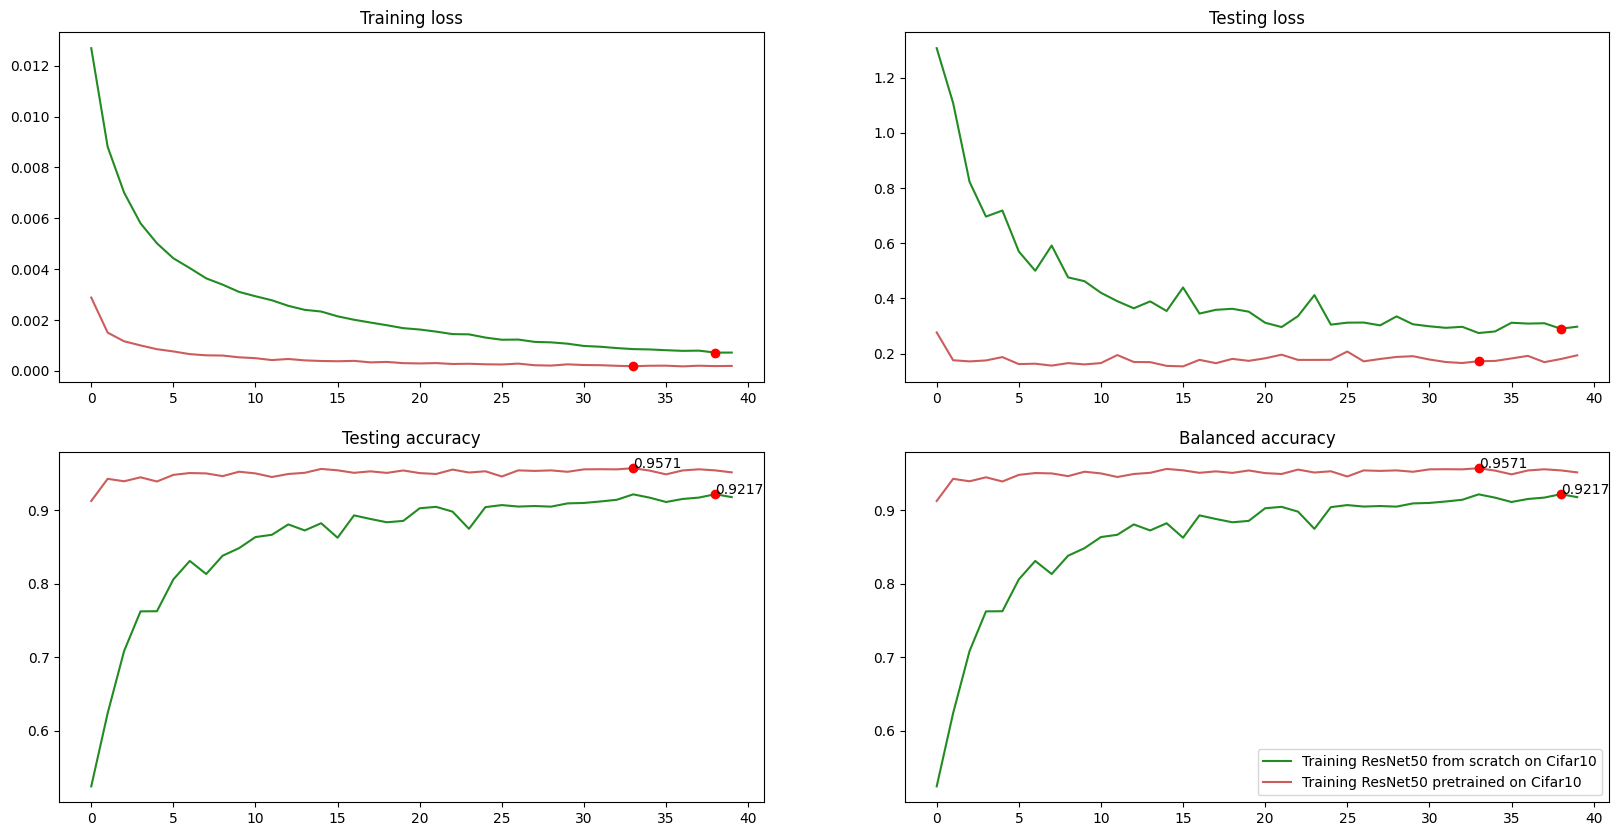

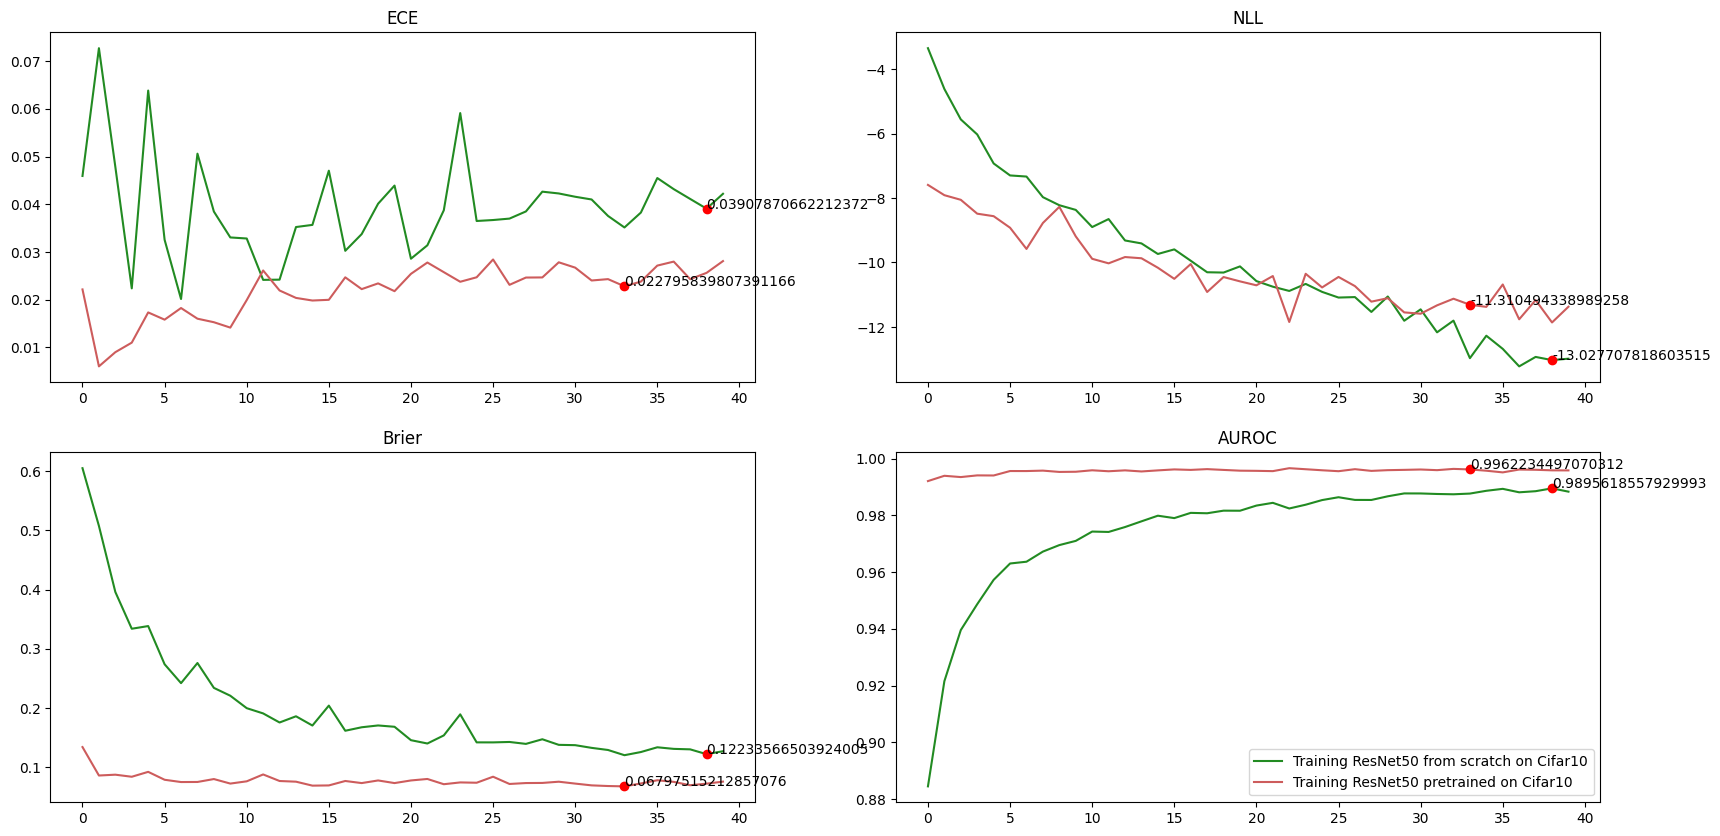

In [103]:
extract_data(json_data, valid_data)
